In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from konlpy.tag import Okt
from pykrx import stock
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
greed_word = ['매수','사','사다','사라','사면','사고','줍다','들어오다','들어가다','타다','수급','매집','올라타다' # 주식 구매 단어
              ,'탑승','불나방','담다','영차'
              ,'오르다','올라가다','올리다','올려주다','올린다','오름','올려놓다','오른','상향' # 주식 가격 상승 단어
              ,'양봉','상방','상승','살아나다','양전','상한','반등','폭등','퍽등','급등'
              ,'탐욕','찬티','좋다','간다','가다','가즈','싸다','익절','제발','최고','돌파','수익','위대하다','먹다' # 탐욕 단어
              ,'기회','호재','감사','감사하다','대박','대단하다','승리','찬양','믿다','회복','갓','부활'
              ,'개꿀']

fear_word = ['공매도','공매','매도','팔','파다','팔다','팔고','팔면','던지다','털다','탈출','튀다','튀어','설거지' # 주식 판매 단어
             ,'손절','버리다'
             ,'떨어지다','떨구다','빠지다','하락','폭락','떡락','조정','급락','음봉','하방','폭포수','음전' # 주식 가격 하락 단어
             ,'반토막','내리다','내려오다','깨지다','대퍽락','나락','붕괴','추락'
             ,'공포','안티','망하다','물리다','끝나다','손해','폭망','거품','무섭다','자살','악재','상폐','개미지옥' # 공포 단어
             ,'시발','염병','욕','짜증나다','걸레','어휴','개','놈','아가리','빡치다','지랄','손실','버티다','존버'
             ,'개관','주가조작','쓰레기','죽다','패닉','홀딩','바닥','흑우','추매','추미애']

In [36]:
df = pd.read_csv('./src/네이버종토방댓글_카카오_15000.csv')
df = df[df['댓글'] != 'error'] # 크롤링 에러 제거
df = df.dropna() # 결측치 제거
df

,날짜,댓글,조회수,좋아요,싫어요
0,2022-05-03,개미들 조련하는법,26,1,0
1,2022-05-03,6만원,38,1,0
2,2022-05-03,카카오는 끝물입니다 사실상,72,2,2
3,2022-05-03,안티 살발하다,34,2,0
4,2022-05-03,이런 호로개미지옥탕을 만드신,58,3,1
...,...,...,...,...,...
299995,2017-10-18,어차피 또 폭등할텐데 떨필요있나 기회주면...,795,15,3
299996,2017-10-18,오늘 물렸다고 생각하는 사람들은 도대체 ...,961,3,2
299997,2017-10-18,내일도,618,5,1
299998,2017-10-18,아마존 per는 300?,745,4,1


In [37]:
df['한글댓글'] = df['댓글'].str.replace('\[삭제된 게시물의 답글\]',' ')
df['한글댓글'] = df['한글댓글'].str.replace('답글:',' ')
df['한글댓글'] = df['한글댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
df = df[df['한글댓글'] != '']
df = df.reset_index(drop=True)
df

,날짜,댓글,조회수,좋아요,싫어요,한글댓글
0,2022-05-03,개미들 조련하는법,26,1,0,개미들 조련하는법
1,2022-05-03,6만원,38,1,0,만원
2,2022-05-03,카카오는 끝물입니다 사실상,72,2,2,카카오는 끝물입니다 사실상
3,2022-05-03,안티 살발하다,34,2,0,안티 살발하다
4,2022-05-03,이런 호로개미지옥탕을 만드신,58,3,1,이런 호로개미지옥탕을 만드신
...,...,...,...,...,...,...
295849,2017-10-18,어차피 또 폭등할텐데 떨필요있나 기회주면...,795,15,3,어차피 또 폭등할텐데 떨필요있나 기회주면
295850,2017-10-18,오늘 물렸다고 생각하는 사람들은 도대체 ...,961,3,2,오늘 물렸다고 생각하는 사람들은 도대체
295851,2017-10-18,내일도,618,5,1,내일도
295852,2017-10-18,아마존 per는 300?,745,4,1,아마존 는


In [38]:
okt = Okt()

greed_list = []
fear_list = []
for i in range(df.shape[0]):
    comment = df['한글댓글'][i]
    word = okt.morphs(comment, stem=True)
    word_dict = dict(Counter(word))
    
    greed_cnt = 0
    for j in greed_word:
        try:
            greed_cnt += word_dict[j]
        except:
            pass
    greed_list.append(greed_cnt)
        
    fear_cnt = 0
    for k in fear_word:
        try:
            fear_cnt += word_dict[k]
        except:
            pass
    fear_list.append(fear_cnt)
    
    if i % 10000 == 0:
        print(f'현재{i}개 공포/탐욕 필터링 완료')   

현재0개 공포/탐욕 필터링 완료
현재10000개 공포/탐욕 필터링 완료
현재20000개 공포/탐욕 필터링 완료
현재30000개 공포/탐욕 필터링 완료
현재40000개 공포/탐욕 필터링 완료
현재50000개 공포/탐욕 필터링 완료
현재60000개 공포/탐욕 필터링 완료
현재70000개 공포/탐욕 필터링 완료
현재80000개 공포/탐욕 필터링 완료
현재90000개 공포/탐욕 필터링 완료
현재100000개 공포/탐욕 필터링 완료
현재110000개 공포/탐욕 필터링 완료
현재120000개 공포/탐욕 필터링 완료
현재130000개 공포/탐욕 필터링 완료
현재140000개 공포/탐욕 필터링 완료
현재150000개 공포/탐욕 필터링 완료
현재160000개 공포/탐욕 필터링 완료
현재170000개 공포/탐욕 필터링 완료
현재180000개 공포/탐욕 필터링 완료
현재190000개 공포/탐욕 필터링 완료
현재200000개 공포/탐욕 필터링 완료
현재210000개 공포/탐욕 필터링 완료
현재220000개 공포/탐욕 필터링 완료
현재230000개 공포/탐욕 필터링 완료
현재240000개 공포/탐욕 필터링 완료
현재250000개 공포/탐욕 필터링 완료
현재260000개 공포/탐욕 필터링 완료
현재270000개 공포/탐욕 필터링 완료
현재280000개 공포/탐욕 필터링 완료
현재290000개 공포/탐욕 필터링 완료


In [39]:
df['탐욕'] = greed_list
df['공포'] = fear_list
df

,날짜,댓글,조회수,좋아요,싫어요,한글댓글,탐욕,공포
0,2022-05-03,개미들 조련하는법,26,1,0,개미들 조련하는법,0,0
1,2022-05-03,6만원,38,1,0,만원,0,0
2,2022-05-03,카카오는 끝물입니다 사실상,72,2,2,카카오는 끝물입니다 사실상,0,0
3,2022-05-03,안티 살발하다,34,2,0,안티 살발하다,0,1
4,2022-05-03,이런 호로개미지옥탕을 만드신,58,3,1,이런 호로개미지옥탕을 만드신,0,0
...,...,...,...,...,...,...,...,...
295849,2017-10-18,어차피 또 폭등할텐데 떨필요있나 기회주면...,795,15,3,어차피 또 폭등할텐데 떨필요있나 기회주면,1,0
295850,2017-10-18,오늘 물렸다고 생각하는 사람들은 도대체 ...,961,3,2,오늘 물렸다고 생각하는 사람들은 도대체,0,1
295851,2017-10-18,내일도,618,5,1,내일도,0,0
295852,2017-10-18,아마존 per는 300?,745,4,1,아마존 는,0,0


In [40]:
day_df = pd.DataFrame()
day_df[['날짜','댓글 수']] = df.groupby('날짜').count().reset_index()[['날짜','댓글']]
day_df['조회수 합계'] = df.groupby('날짜').sum().reset_index()['조회수']
day_df['탐욕'] = df.groupby('날짜').sum().reset_index()['탐욕']
day_df['공포'] = df.groupby('날짜').sum().reset_index()['공포']
day_df['탐욕-공포'] = day_df['탐욕'] - day_df['공포']
day_df['날짜'] = pd.to_datetime(day_df['날짜'])
day_df = day_df.set_index('날짜')
day_df

,댓글 수,조회수 합계,탐욕,공포,탐욕-공포
날짜,,,,,
2017-10-18,98,91747,23,28,-5
2017-10-19,507,359033,109,129,-20
2017-10-20,307,238024,75,40,35
2017-10-21,84,93449,24,12,12
2017-10-22,65,78679,18,7,11
...,...,...,...,...,...
2022-04-29,146,32946,38,21,17
2022-04-30,64,20384,14,12,2
2022-05-01,52,15756,11,13,-2


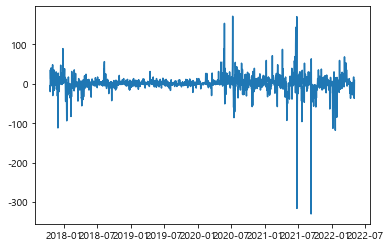

In [41]:
plt.plot(day_df['탐욕-공포'])

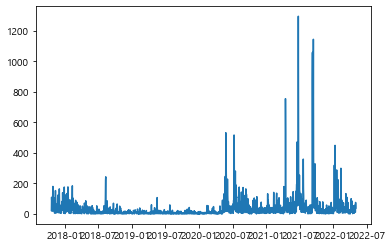

In [42]:
plt.plot(day_df['탐욕'])

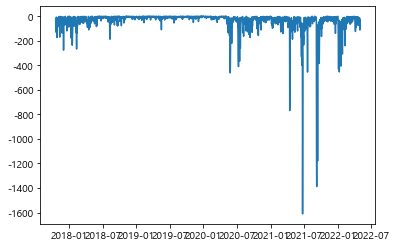

In [43]:
plt.plot(-day_df['공포'])

In [44]:
pykrx_df = stock.get_market_ohlcv_by_date(fromdate='2017-10-18', todate='2022-05-02', ticker="035720", adjusted=False)
pykrx_df

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2017-10-18,156500,156500,147500,148500,1640427,248035374500,-5.71
2017-10-19,149000,151500,145000,147000,1065448,157905851500,-1.01
2017-10-20,149000,151500,148000,150000,667108,99843212500,2.04
2017-10-23,149000,151500,147500,151000,565904,84791752000,0.67
2017-10-24,151000,153000,150000,150000,467080,70622073500,-0.66
...,...,...,...,...,...,...,...
2022-04-26,89800,91700,89700,90200,1368258,123958023400,0.56
2022-04-27,87600,88900,87600,88400,1390581,122826213900,-2.00
2022-04-28,89700,89800,88100,89300,1216554,108273498400,1.02


In [45]:
df2 = pykrx_df[['종가','등락률']].join(day_df).reset_index()
df2

,날짜,종가,등락률,댓글 수,조회수 합계,탐욕,공포,탐욕-공포
0,2017-10-18,148500,-5.71,98,91747,23,28,-5
1,2017-10-19,147000,-1.01,507,359033,109,129,-20
2,2017-10-20,150000,2.04,307,238024,75,40,35
3,2017-10-23,151000,0.67,269,239635,66,28,38
4,2017-10-24,150000,-0.66,285,216197,68,28,40
...,...,...,...,...,...,...,...,...
1113,2022-04-26,90200,0.56,158,34934,28,37,-9
1114,2022-04-27,88400,-2.00,338,75712,57,56,1
1115,2022-04-28,89300,1.02,133,31757,34,19,15
1116,2022-04-29,89900,0.67,146,32946,38,21,17


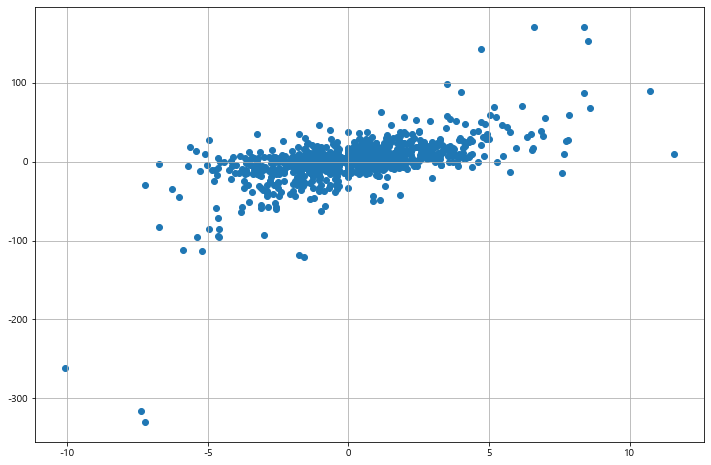

In [46]:
plt.figure(figsize=(12,8))

x = df2['등락률']
y = df2['탐욕-공포']

plt.scatter(x, y)
plt.grid()
plt.show()

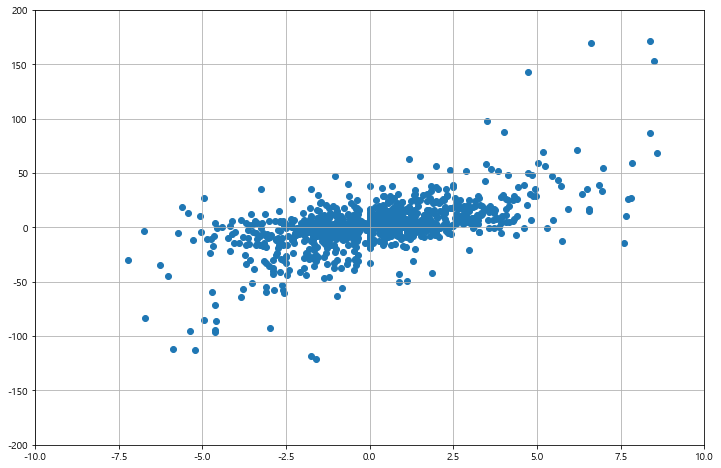

In [47]:
plt.figure(figsize=(12,8))

x = df2['등락률']
y = df2['탐욕-공포']

plt.axis([-10, 10, -200, 200])
plt.scatter(x, y)
plt.grid()
plt.show()

In [48]:
len(df2[df2['등락률'] > 0][df2['탐욕-공포'] > 0]) # 1사분면

398

In [49]:
len(df2[df2['등락률'] < 0][df2['탐욕-공포'] > 0]) # 2사분면

172

In [50]:
len(df2[df2['등락률'] < 0][df2['탐욕-공포'] < 0]) # 3사분면

300

In [51]:
len(df2[df2['등락률'] > 0][df2['탐욕-공포'] < 0]) # 4사분면

118

In [52]:
len(df2[df2['등락률'] == 0]) # x축

93

In [53]:
len(df2[df2['탐욕-공포'] == 0]) # y축

46